# Reading the Data 
**Importing python libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Supressing the warning messages**

In [3]:
import warnings
warnings.filterwarnings('ignore')

**Reading the dataset**

In [4]:
ConcreteData=pd.read_csv("R:\DS\Ivy\Python\Python Datasets\Regression Datasets\ConcreteStrengthData.csv")
print('Shape before deleting duplicate values:', ConcreteData.shape)

Shape before deleting duplicate values: (1030, 9)


**Removing duplicate values**

In [5]:
ConcreteData=ConcreteData.drop_duplicates()
print('Shape after deleting duplicate values:', ConcreteData.shape)

Shape after deleting duplicate values: (1005, 9)


# Basic Data Exploration

In [6]:
ConcreteData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1005 non-null   float64
 1   BlastFurnaceSlag           1005 non-null   float64
 2   FlyAshComponent            1005 non-null   float64
 3   WaterComponent             1005 non-null   float64
 4   SuperplasticizerComponent  1005 non-null   float64
 5   CoarseAggregateComponent   1005 non-null   float64
 6   FineAggregateComponent     1005 non-null   float64
 7   AgeInDays                  1005 non-null   int64  
 8   Strength                   1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [7]:
ConcreteData.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
#Checking for null values
ConcreteData.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [9]:
#Checking the first 10 values
ConcreteData.head(10)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


# Defining the problem statement: 
#### Predict the strength  of  concrete based on its material composition. Analyze which ingredient affects the strength and which one does not matter much

* Target Variable: Strength

# Renaming the columns

In [10]:
ConcreteData.rename(columns={   'BlastFurnaceSlag':'furnace',
                                'FlyAshComponent':'ash',
                                'WaterComponent':'water',
                                'SuperplasticizerComponent':'plasticizer',
                                'CoarseAggregateComponent':'coarse_aggregate',
                                'FineAggregateComponent':'fine_aggregate',
                                'AgeInDays':'age',
                                'CementComponent ':'cement'},inplace=True)

In [11]:
ConcreteData.head()

,cement,furnace,ash,water,plasticizer,coarse_aggregate,fine_aggregate,age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Determining the type of Machine Learning Algorithm
Based on the problem statement we need to create a **supervised ML Regression model**, as the target variable is Continuous.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

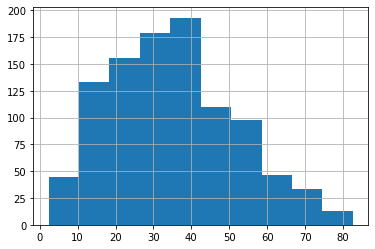

In [12]:
ConcreteData['Strength'].hist()

In [13]:
ConcreteData.nunique()

cement              278
furnace             185
ash                 156
water               195
plasticizer         111
coarse_aggregate    284
fine_aggregate      302
age                  14
Strength            845
dtype: int64

# Basic Data Exploration Results

Both the predictors and target variable are continuous

# Visual Exploratory Data Analysis
* Continuous variables: Histogram

**Predictors:** cement,furnace,ash,water,plasticizer,coarse_aggregate,fine_aggregate,age

In [14]:
Predictors=['cement','furnace','ash','water','plasticizer','coarse_aggregate','fine_aggregate','age']

array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'furnace'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'plasticizer'}>,
        <AxesSubplot:title={'center':'coarse_aggregate'}>],
       [<AxesSubplot:title={'center':'fine_aggregate'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

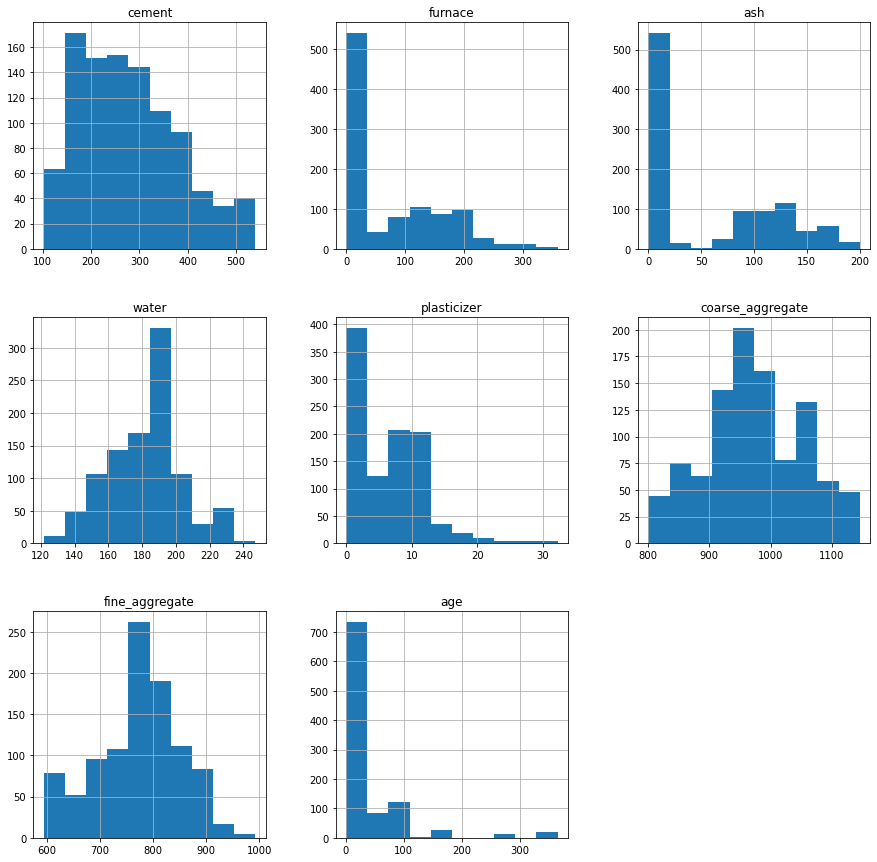

In [15]:
ConcreteData[Predictors].hist(figsize=(15,15))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

The distribution of all the predictors looks good, hence selected.

# Feature Selection (Bi-Variate analysis)
The best columns/features which are correlated to the Target Variable are estimated by measuring the correlation values or ANOVA/Chi-Square tests.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study both the Target variable and Predictors are Continuous, hence
* Continuous Target Variable Vs Continuous Predictor

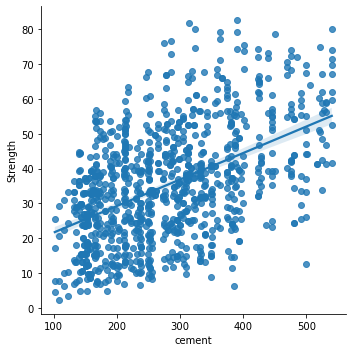

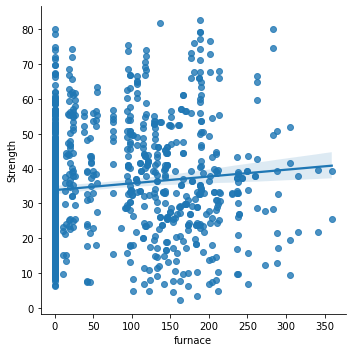

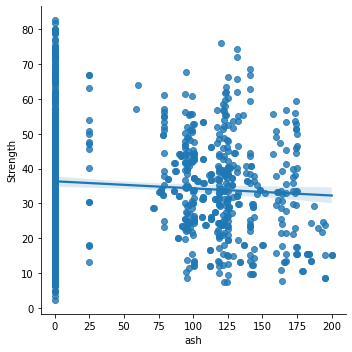

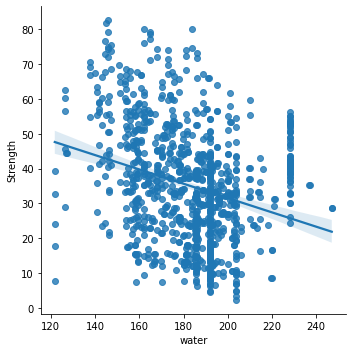

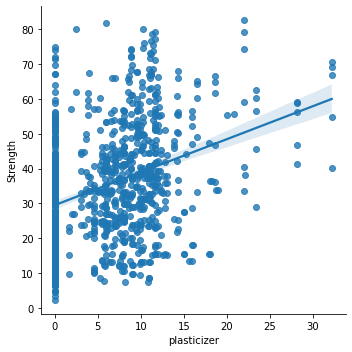

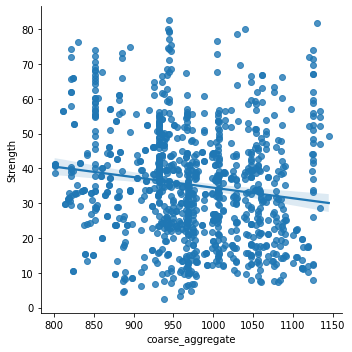

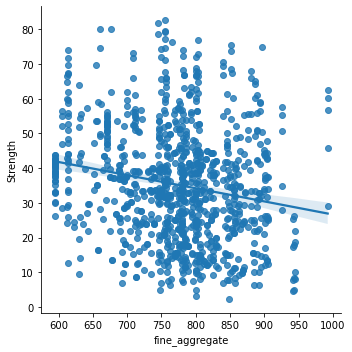

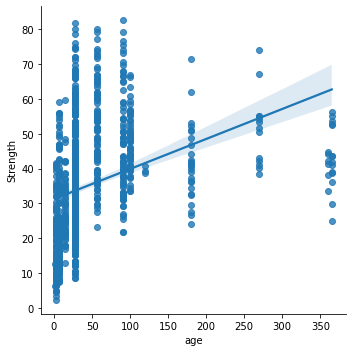

In [16]:
# Plotting scatter chart for each predictor vs the target variable
for i in Predictors:
    sns.lmplot(data=ConcreteData,x=i,y='Strength')

# Scatter charts interpretation

See if there is a visible trend or not. There could be three scenarios:
1. Increasing Trend:
This means both variables are positively correlated.

2. Decreasing Trend:
This means both variables are negatively correlated. 

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Correlation between (-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1) means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>

In [17]:
Cols=['Strength','cement', 'furnace', 'ash', 'water', 'plasticizer', 'coarse_aggregate', 'fine_aggregate', 'age']
ConcreteData[Cols].corr()

,Strength,cement,furnace,ash,water,plasticizer,coarse_aggregate,fine_aggregate,age
Strength,1.000000,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367
cement,0.488283,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348
furnace,0.103374,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759
ash,-0.080648,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940
water,-0.269624,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284
plasticizer,0.344209,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076
coarse_aggregate,-0.144717,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264
fine_aggregate,-0.186448,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572
age,0.337367,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000


**Selected columns:** cement, plasticizer,age

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [18]:
Predictors=['cement','plasticizer','age']
final_df=ConcreteData[Predictors]
final_df.head()

,cement,plasticizer,age
0,540.0,2.5,28
1,540.0,2.5,28
2,332.5,0.0,270
3,332.5,0.0,365
4,198.6,0.0,360


In [19]:
#Adding target variable to the data
final_df['strength']=ConcreteData['Strength']
final_df.head()

,cement,plasticizer,age,strength
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27
3,332.5,0.0,365,41.05
4,198.6,0.0,360,44.30


# Machine Learning: Splitting the data into Training and Testing sample

In [20]:
x=final_df[Predictors]
y=final_df['strength']

In [21]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Multiple Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [23]:
from sklearn import metrics

In [24]:
# Measuring Goodness of fit in Training data
print('R2 score:',metrics.r2_score(y_train,lm.predict(x_train)))

R2 score: 0.4906691059684887


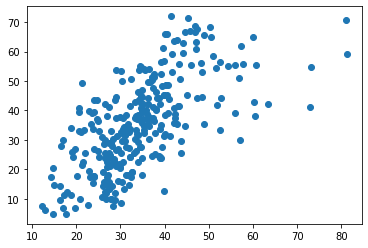

In [25]:
prediction=lm.predict(x_test)
plt.scatter(prediction,y_test)

In [26]:
mape=np.mean(abs((prediction-y_test)/y_test)*100)
med=np.median(abs((prediction-y_test)/y_test)*100)

print('Mean accuracy on test data:',100-mape)
print('Median accuracy on test data:',100-med)


Mean accuracy on test data: 63.67206990368316
Median accuracy on test data: 75.04673144838198


In [28]:
#Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    mape=np.mean(abs((orig-pred)/pred)*100)
    return(100-mape)

#Custom scoring MAPE calculation
from sklearn.metrics import make_scorer
cust_score=make_scorer(Accuracy_Score)


#Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
print('Average accuracy:',round(cross_val_score(lm,x,y,cv=5,scoring=cust_score).mean(),2))

Average accuracy: 71.47


# Decision Trees

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=3,criterion='mse')
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [32]:
# Measuring Goodness of fit in Training data
print('R2 score on training data:',metrics.r2_score(y_train,dt.predict(x_train)))

R2 score on training data: 0.616864430550941


<AxesSubplot:>

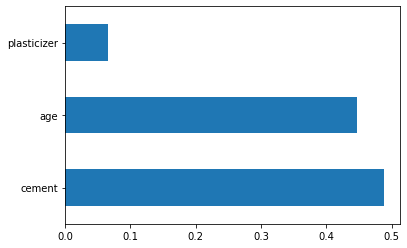

In [37]:
# Plotting the feature importance for Top 3 most important columns
pd.Series(dt.feature_importances_,index=Predictors).nlargest(3).plot(kind='barh')

In [41]:
prediction=dt.predict(x_test)

test_mape=np.mean(abs((prediction-y_test)/y_test)*100)
test_med=np.median(abs((prediction-y_test)/y_test)*100)

print('Mean accuracy of model:', 100-test_mape)
print('Median accuracy of model:',100-test_med)
print('Average accuracy of the model:', round(cross_val_score(dt,x,y,cv=5,scoring=cust_score).mean(),2))

Mean accuracy of model: 66.71460103793049
Median accuracy of model: 76.80740255272252
Average accuracy of the model: 64.43


### Plotting a Decision Tree

In [44]:
import os
os.environ['PATH']+=os.pathsep+'C:\\Users\\eshvi\\anaconda3\\Library\\bin\\graphviz'

In [45]:
from IPython.display import Image
from sklearn import tree
import pydotplus

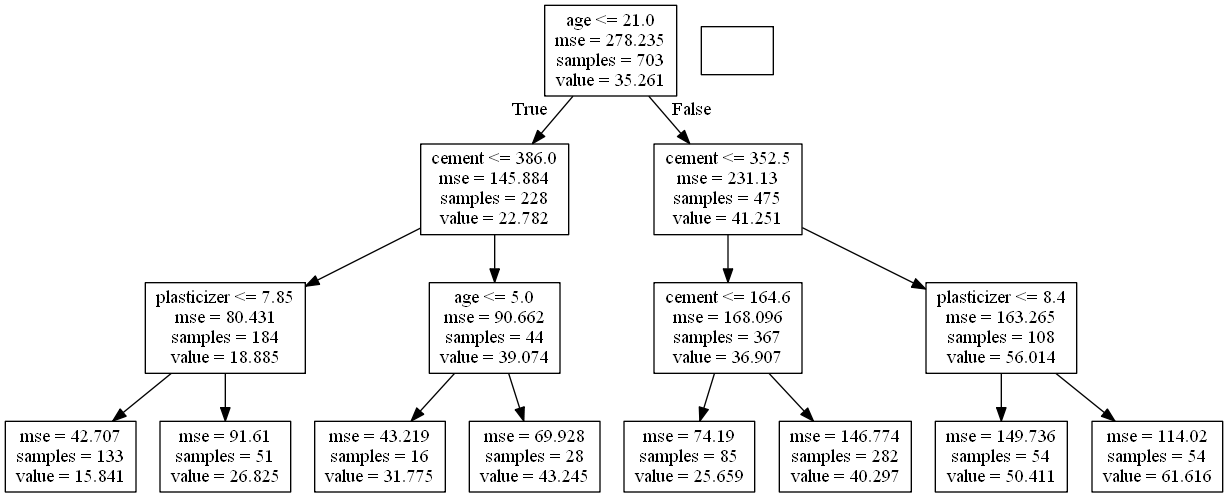

In [47]:
#Create DOT Data
dot_data=tree.export_graphviz(dt,feature_names=Predictors,class_names=y)

#Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)

#Show graph
Image(graph.create_png(),height=7000,width=7000)